<a href="https://colab.research.google.com/github/gloriagutierrez2025/Challenger-G1/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go


### Importación de datos



In [31]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [4]:
suma=tienda["Precio"].sum()
print(suma)
suma2=tienda2["Precio"].sum()
print(suma2)
suma3=tienda3["Precio"].sum()
print(suma3)
suma4=tienda4["Precio"].sum()
print(suma4)







1150880400.0
1116343500.0
1098019600.0
1038375700.0


#1. Análisis de facturación



In [5]:
tiendas_df={"tienda1":tienda,"tienda2":tienda2,"tienda3":tienda3,"tienda4":tienda4}
for nombre, df in tiendas_df.items():
 total_ventas =float(df["Precio"].sum())
 print(f"{nombre}: ${total_ventas}")
 print("---")


tienda1: $1150880400.0
---
tienda2: $1116343500.0
---
tienda3: $1098019600.0
---
tienda4: $1038375700.0
---


In [6]:
tienda_mayor_ventas = max(tiendas_df, key=lambda x: tiendas_df[x]["Precio"].sum())
print(f"La tienda con mayor facturación es: {tienda_mayor_ventas}")


La tienda con mayor facturación es: tienda1


In [7]:
ventas_por_ubicacion = tienda.groupby("Lugar de Compra")["Precio"].sum()
print(ventas_por_ubicacion)
ventas_por_ubicacion2 = tienda2.groupby("Lugar de Compra")["Precio"].sum()
print(ventas_por_ubicacion2)


Lugar de Compra
Armenia            4615700.0
Barranquilla      32907700.0
Bogotá           440005000.0
Bucaramanga       17579200.0
Cali             154493700.0
Cartagena         22296700.0
Cúcuta            37879500.0
Inírida            2722500.0
Leticia           14669800.0
Manizales          8027600.0
Medellín         296858100.0
Neiva              3494000.0
Pasto             14996400.0
Pereira           56214300.0
Riohacha          18512700.0
Santa Marta       13198300.0
Soacha             4126000.0
Valledupar         1121300.0
Villavicencio      7161900.0
Name: Precio, dtype: float64
Lugar de Compra
Armenia            3363200.0
Barranquilla      27741300.0
Bogotá           479959200.0
Bucaramanga       23895600.0
Cali             118257600.0
Cartagena         21548300.0
Cúcuta            28991500.0
Inírida            2504600.0
Leticia           16159000.0
Manizales          3539900.0
Medellín         297246700.0
Neiva              3839400.0
Pasto             12800100.0
Pereira    

In [8]:
grafico_lugar_de_compra = go.Figure(data=[go.Pie(labels=ventas_por_ubicacion.index, values=ventas_por_ubicacion.values)])
grafico_lugar_de_compra.show()


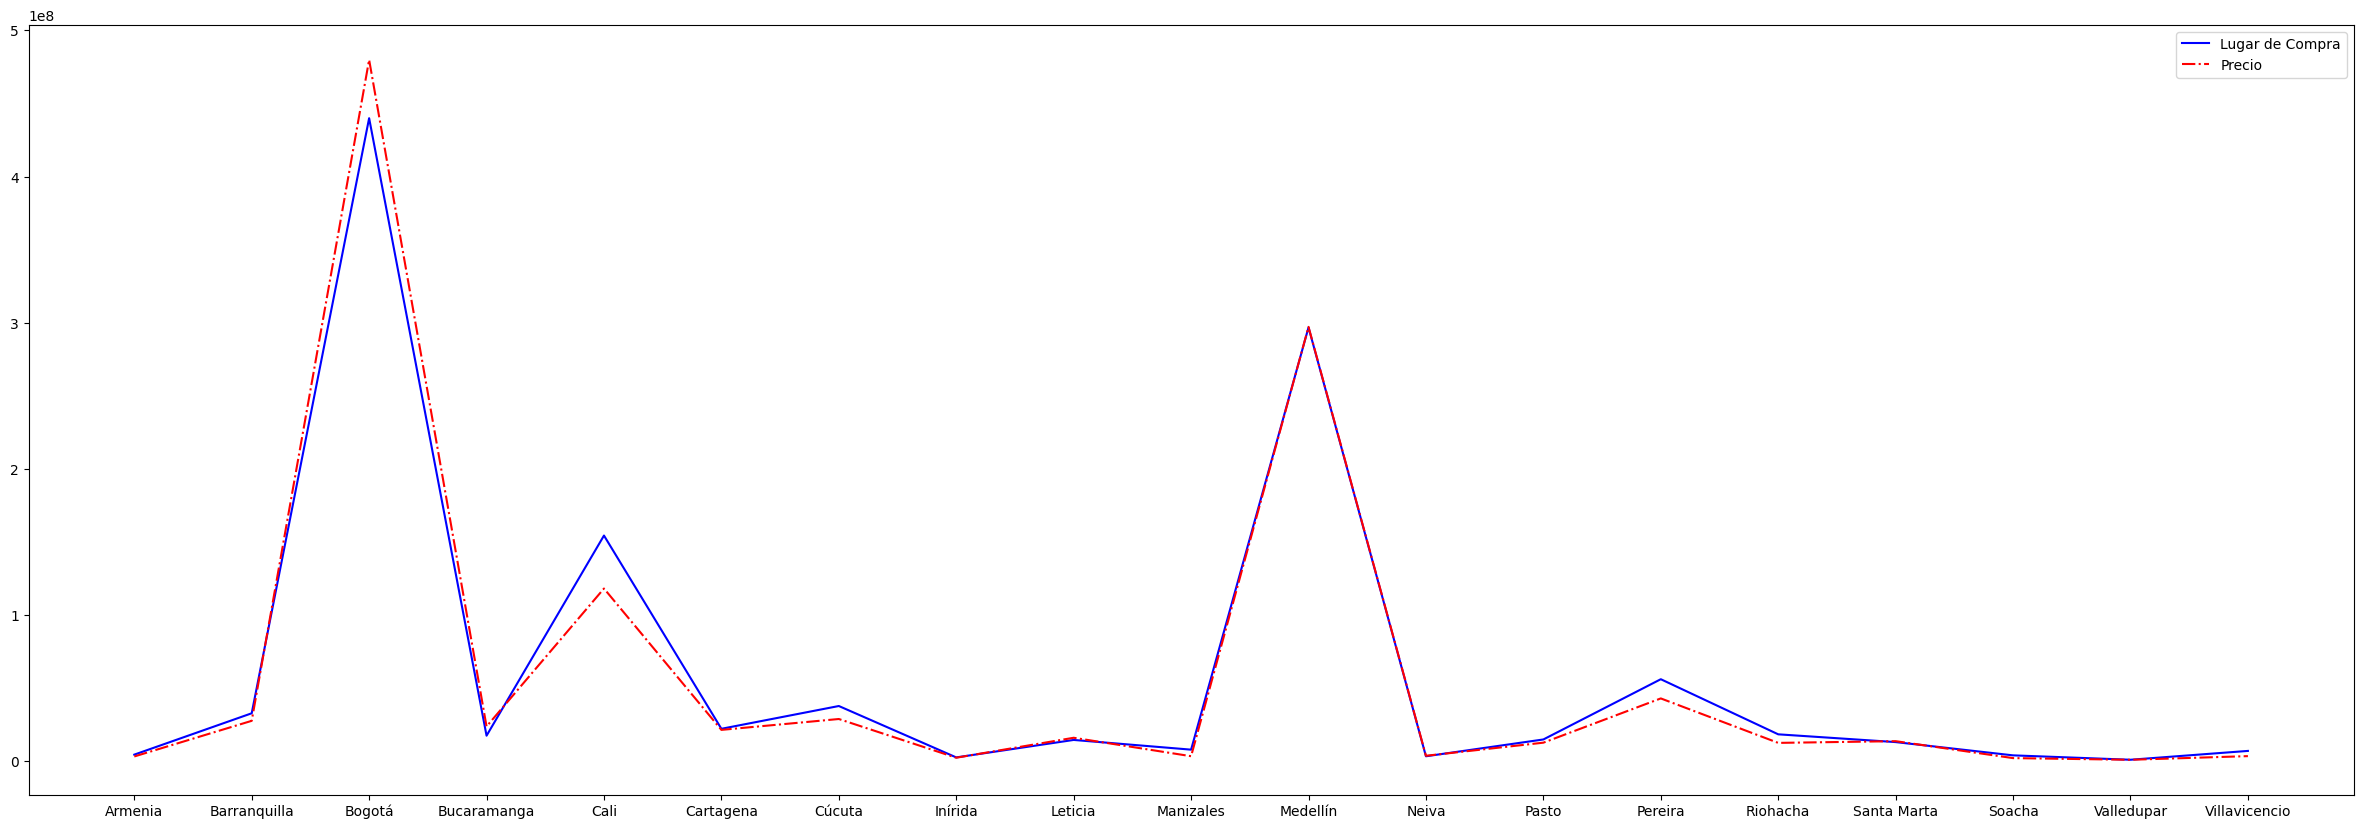

In [29]:
x = ventas_por_ubicacion.index
y1 = ventas_por_ubicacion.values
y2 = ventas_por_ubicacion2.values


plt.figure(figsize=(30, 10))
plt.plot(x, y1, 'b-', label='Lugar de Compra')    # graficamos función y1
plt.plot(x, y2, 'r-.', label='Precio') # graficamos función y2
plt.legend() # Le decimos a maplotlib que muestre todos los labels
plt.show()


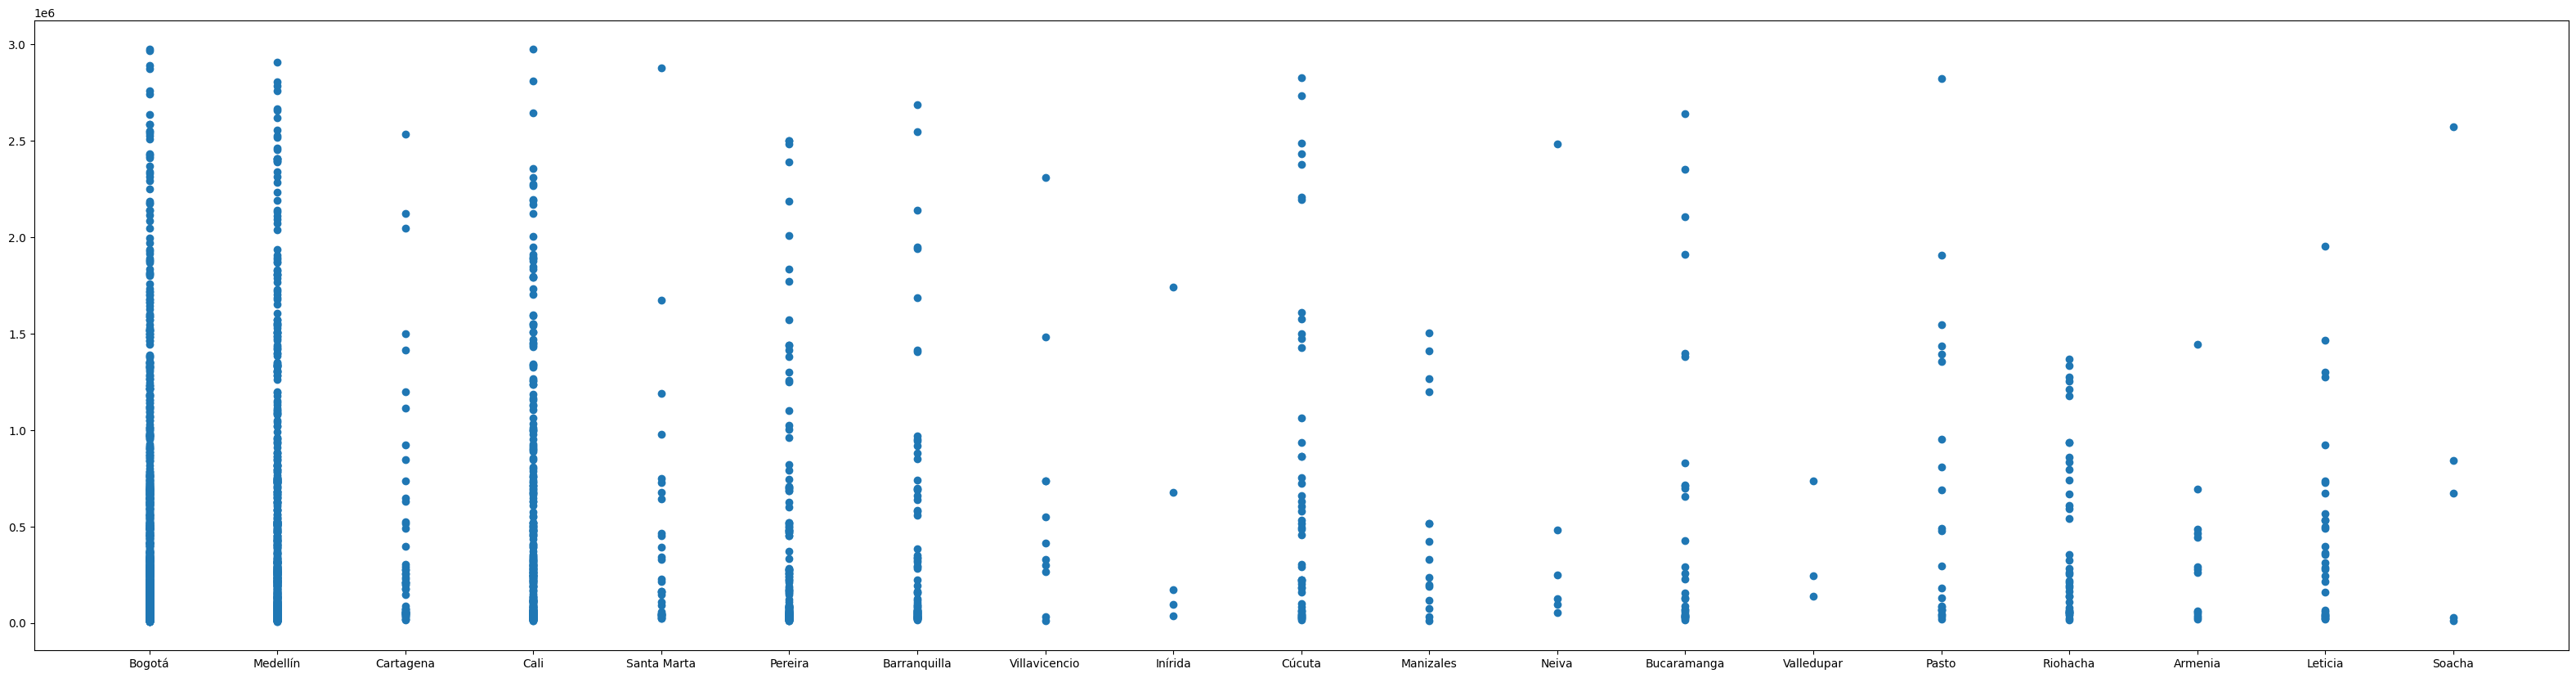

In [52]:
x=tienda["Lugar de Compra"]
y=tienda["Precio"]
plt.figure(figsize=(40, 10))
plt.scatter(x,y)
plt.show()


In [68]:
grafico_tienda_mayor_ventas = go.Figure(data=[go.Pie(labels=list(tiendas_df.keys()), values=[tiendas_df[tienda]["Precio"].sum() for tienda in tiendas_df])])
grafico_tienda_mayor_ventas


In [60]:
vendedor_mas_ventas = tienda["Vendedor"].value_counts().idxmax()
print(f"El vendedor con más ventas es: {vendedor_mas_ventas}")
vendedor_mas_ventas_por_tienda=tienda.groupby("Vendedor")["Precio"].sum()
print(vendedor_mas_ventas_por_tienda)

El vendedor con más ventas es: Izabela de León
Vendedor
Beatriz Morales     79347300.0
Blanca Ramirez      74766300.0
Camila Rivera       75847900.0
Felipe Santos       90206900.0
Izabela de León     93776500.0
Juan Fernandez      78040000.0
Juliana Costa       85678500.0
Lucas Olivera       84882800.0
Maria Alfonso      101528700.0
Mariana Herrera     71352200.0
Pedro Gomez         82973900.0
Rafael Acosta       96271300.0
Santiago Silva      70093900.0
Ángel Rodriguez     66114200.0
Name: Precio, dtype: float64


In [69]:
grafico_por_vendedor=go.Figure(data=[go.Pie(labels=list(vendedor_mas_ventas_por_tienda.index), values=vendedor_mas_ventas_por_tienda.values)])
grafico_por_vendedor
grafico_por_vendedor.show()



In [62]:
fecha_de_compra_por_tienda={"tienda1":tienda["Fecha de Compra"].value_counts().idxmax(),
                     "tienda2":tienda2["Fecha de Compra"].value_counts().idxmax(),
                     "tienda3":tienda3["Fecha de Compra"].value_counts().idxmax(),
                     "tienda4":tienda4["Fecha de Compra"].value_counts().idxmax()}

print(fecha_de_compra_por_tienda)


{'tienda1': '15/05/2021', 'tienda2': '20/12/2021', 'tienda3': '01/08/2022', 'tienda4': '13/11/2020'}


In [63]:
precio_tienda_fecha = tienda.groupby(["Fecha de Compra", "Vendedor"])["Precio"].sum()
print(precio_tienda_fecha)
precio_tienda_fecha_tienda2 = tienda2.groupby(["Fecha de Compra", "Vendedor"])["Precio"].sum()
print(precio_tienda_fecha_tienda2)
precio_tienda_fecha_tienda3 = tienda3.groupby(["Fecha de Compra", "Vendedor"])["Precio"].sum()
print(precio_tienda_fecha_tienda3)
precio_tienda_fecha_tienda4 = tienda4.groupby(["Fecha de Compra", "Vendedor"])["Precio"].sum()
print(precio_tienda_fecha_tienda4)


Fecha de Compra  Vendedor       
01/01/2020       Juliana Costa      1440000.0
01/01/2021       Juliana Costa       593900.0
01/01/2022       Pedro Gomez          27600.0
01/01/2023       Blanca Ramirez       33600.0
                 Maria Alfonso       627500.0
                                      ...    
31/12/2020       Lucas Olivera       115600.0
                 Rafael Acosta       191200.0
31/12/2022       Camila Rivera       354600.0
                 Juliana Costa      1048700.0
                 Mariana Herrera      55200.0
Name: Precio, Length: 2197, dtype: float64
Fecha de Compra  Vendedor       
01/01/2020       Camila Rivera       51200.0
                 Izabela de León     69300.0
                 Juliana Costa       19400.0
01/01/2021       Izabela de León     18900.0
01/01/2022       Juliana Costa       47400.0
                                      ...   
31/12/2020       Mariana Herrera     82600.0
31/12/2021       Izabela de León    260700.0
31/12/2022       Blanca R

# 2. Ventas por categoría

In [64]:
ventas_por_categoria = tienda.groupby("Categoría del Producto")["Precio"].sum()
print(ventas_por_categoria)




Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64


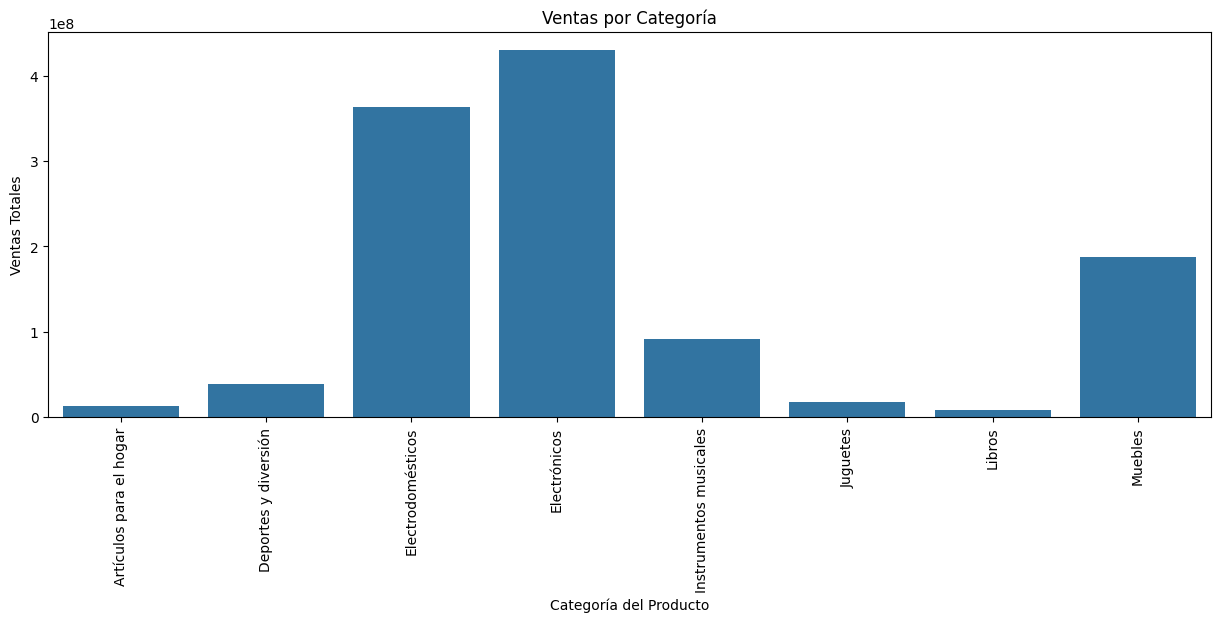

In [65]:
plt.figure(figsize=(15, 5))
sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values)
plt.title("Ventas por Categoría")
plt.xlabel("Categoría del Producto")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=90)
plt.show()





# 3. Calificación promedio de la tienda


In [66]:
tiendas={"tienda1":tienda,"tienda2":tienda2,"tienda3":tienda3,"tienda4":tienda4}
for nombre, df in tiendas.items():
 calificacion_promedio = df["Calificación"].mean()
 print(f"{nombre}: {calificacion_promedio}")
tienda_mejor_evaluada = max(tiendas, key=lambda x: tiendas[x]["Calificación"].mean())
print(f"La tienda mejor evaluada es: {tienda_mejor_evaluada}")





tienda1: 3.976685036032217
tienda2: 4.037303942348453
tienda3: 4.048325561678677
tienda4: 3.9957591178965224
La tienda mejor evaluada es: tienda3


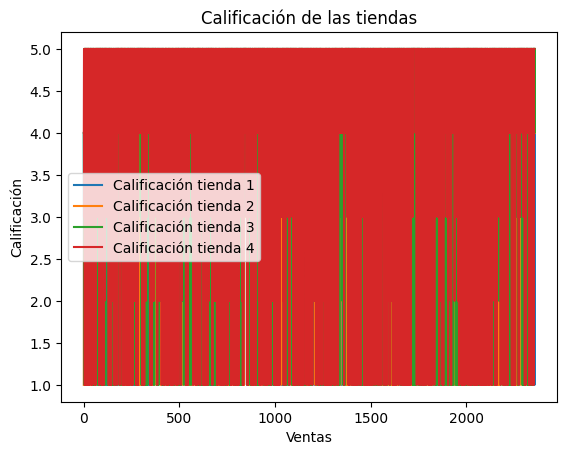

In [25]:
plt.plot(tienda["Calificación"], label="Calificación tienda 1")
plt.plot(tienda2["Calificación"], label="Calificación tienda 2")
plt.plot(tienda3["Calificación"], label="Calificación tienda 3")
plt.plot(tienda4["Calificación"], label="Calificación tienda 4")
plt.title("Calificación de las tiendas")
plt.xlabel("Ventas")
plt.ylabel("Calificación")
plt.legend()
plt.show()




# 4. Productos más y menos vendidos

In [50]:
producto_mas_vendido = tienda["Producto"].value_counts().idxmax()
producto_menos_vendido = tienda["Producto"].value_counts().idxmin()
print(f"El producto más vendido es: {producto_mas_vendido}")


El producto más vendido es: Microondas


In [51]:
producto_menos_vendido = tienda["Producto"].value_counts().idxmin()
print(f"El producto menos vendido es: {producto_menos_vendido}")


El producto menos vendido es: Auriculares con micrófono


# 5. Envío promedio por tienda

In [67]:
costo_envio_promedio_tienda1 = tienda["Costo de envío"].mean()
costo_envio_promedio_tienda2 = tienda2["Costo de envío"].mean()
costo_envio_promedio_tienda3 = tienda3["Costo de envío"].mean()
costo_envio_promedio_tienda4 = tienda4["Costo de envío"].mean()
print(f"El costo de envío promedio de la tienda 1 es: {costo_envio_promedio_tienda1}")
print(f"El costo de envío promedio de la tienda 2 es: {costo_envio_promedio_tienda2}")
print(f"El costo de envío promedio de la tienda 3 es: {costo_envio_promedio_tienda3}")
print(f"El costo de envío promedio de la tienda 4 es: {costo_envio_promedio_tienda4}")


El costo de envío promedio de la tienda 1 es: 26018.60958033065
El costo de envío promedio de la tienda 2 es: 25216.235693090293
El costo de envío promedio de la tienda 3 es: 24805.680373039424
El costo de envío promedio de la tienda 4 es: 23459.457167090754


# Extra

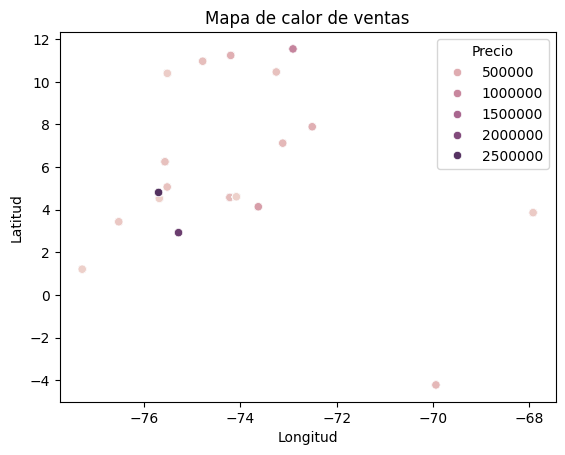

In [9]:
sns.scatterplot(x="lon", y="lat", hue="Precio", data=df)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Mapa de calor de ventas")
plt.show()

